In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# creating the f(t) sequence
a, b, steps = (0, 14*np.pi, 10000)

# time, t
t = np.linspace(a, b, steps)

# f(t)
sequence = np.cos(t)

In [3]:
# setting training and validation percent
tr = 80
valPercent = 10

# training size
trainSize = int( len(sequence)*tr/100.0 )

# validation size
valSize = int( len(sequence)*valPercent/100.0 )

# set the window size
window = 10

In [4]:
# splitting the time series into train, validation and test sets
train = sequence[ : trainSize]  # train set

val = sequence[ trainSize - window : trainSize + valSize]  # validation set

test = sequence[ trainSize + valSize - window : ]  # test set

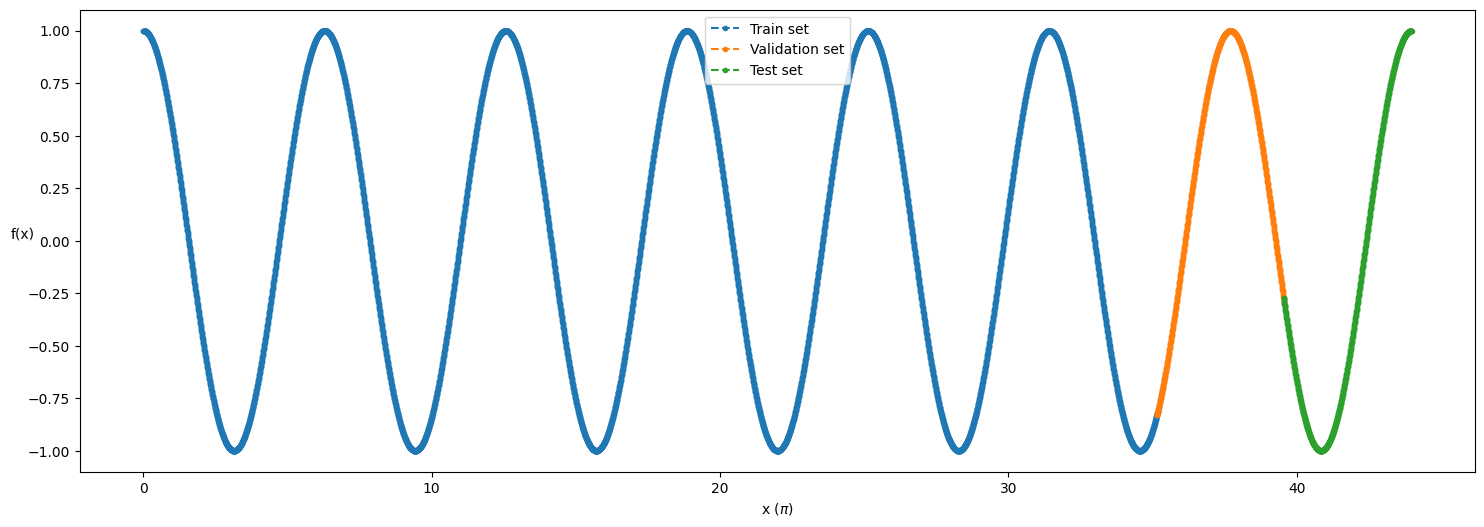

In [5]:
# plotting the sets
fig = plt.figure( figsize = (18,6) )

plt.plot(t[:trainSize], train, "o--", markersize = 3, label = "Train set")
plt.plot(t[trainSize - window : trainSize + valSize], val, "o--", markersize = 3, label = "Validation set")
plt.plot(t[trainSize + valSize - window : ], test, "o--", markersize = 3, label = "Test set")

plt.ylabel("f(x)", rotation = 1)
plt.xlabel(r"x $(\pi)$")

plt.legend()
plt.show()

In [6]:
# converting a sequence to a supervise learning data set
def create_dataset(dataset, look_back = 1) :
  dataX, dataY = [], []
  for i in range( len(dataset) - look_back ) :
    a = dataset[i : i + look_back]
    dataX.append(a)
    dataY.append(dataset[i + look_back])
  return np.array(dataX), np.array(dataY)

In [7]:
# train
x_train, y_train = create_dataset(train, window)
print ("Train:", x_train.shape, y_train.shape)

# validation
x_val, y_val = create_dataset(val, window)
print ("Validation:", x_val.shape, y_val.shape)

# test
x_test, y_test   = create_dataset(test, window)
print ("Test:", x_test.shape, y_test.shape)

Train: (7990, 10) (7990,)
Validation: (1000, 10) (1000,)
Test: (1000, 10) (1000,)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
np.random.seed(44)
tf.random.set_seed(44)

# converting the datasets to LSTM friendly format [samples, timesteps, features]
x_train_lstm = np.reshape(x_train, (-1, window, 1))
x_val_lstm   = np.reshape(  x_val, (-1, window, 1))
x_test_lstm  = np.reshape( x_test, (-1, window, 1))

# creating a sequantial model with an LSTM layer of 100 nodes
model = Sequential()
model.add(Input(shape = (window, 1)))
model.add(LSTM(100))
model.add(Dense(1))

# compiling the model
model.compile(loss = "mse", optimizer = "adam")

# printing the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# using early stopping to avoid overfitting
earlyStopping = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

history = model.fit(x_train_lstm, y_train,
                   epochs = 100, batch_size = 32,
                   validation_data = (x_val_lstm, y_val),
                   callbacks = [earlyStopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0573 - val_loss: 4.3351e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2967e-04 - val_loss: 3.5742e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6531e-04 - val_loss: 2.9068e-04
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2449e-04 - val_loss: 2.6475e-04
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1181e-04 - val_loss: 2.4208e-04
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9357e-04 - val_loss: 1.8153e-04
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6822e-04 - val_loss: 1.4524e-04
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4892e-04 - val_loss: 1.2517e-04
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1442e-04 - val_loss: 2.8291e-04
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.9139e-05 - val_loss: 5.8274e-05
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

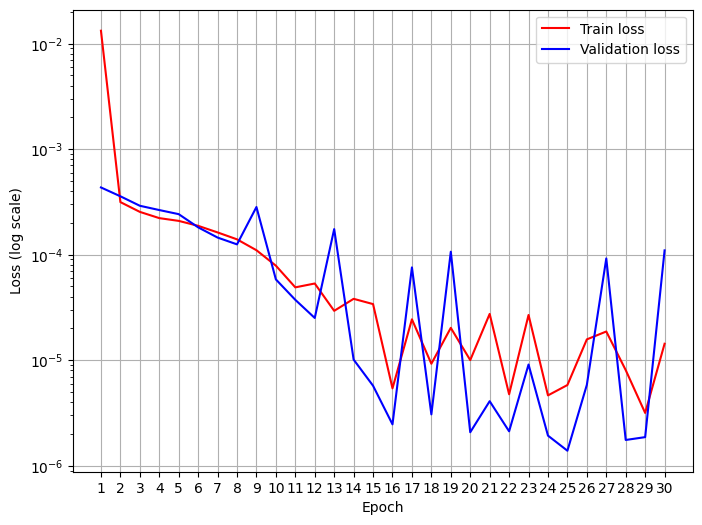

In [11]:
x_values = range(1, len(history.history['loss'])+1)
fig = plt.figure(figsize = (8,6))
plt.plot(x_values, history.history['loss'], "r-", label = "Train loss")
plt.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
plt.ylabel("Loss (log scale)")
plt.xlabel("Epoch")
plt.grid()
plt.yscale("log")
plt.xticks(x_values)
plt.legend()
plt.show()

In [12]:
def predictionOnPredictionLSTM(model, initialValue, nOfPredictions):
  # starting the predictions
  inputs = initialValue
  # creating an empty array
  predictions = []

  # looping over the test set data and make prediction using 
  for i in range(nOfPredictions) :
    v = model.predict(inputs.reshape(-1, inputs.shape[0], inputs.shape[1]), verbose = 0)[0]
    predictions.append(v)
    # creating the next input
    inputs = np.roll(inputs, -1)
    inputs[-1] = v[0]
    inputs = np.expand_dims(inputs, axis = 0)[0]

  return np.array(predictions)

In [13]:
prediction_horizon = 30
predictions_LSTM_10 = predictionOnPredictionLSTM(model, x_test_lstm[0], prediction_horizon)

In [14]:
print ("True value  Pred value  Error (%)")
for y_true, y_pred in zip(y_test[:10], predictions_LSTM_10[:10]) :
  print(f"{y_true:10.6f} {y_pred[0]:10.6f} {100*abs((y_pred[0]-y_true)/y_true):10.6f}")

True value  Pred value  Error (%)
 -0.312780  -0.312842   0.020018
 -0.316955  -0.317028   0.023070
 -0.321123  -0.321218   0.029493
 -0.325286  -0.325411   0.038367
 -0.329442  -0.329603   0.048920
 -0.333592  -0.333794   0.060621
 -0.337736  -0.337982   0.073056
 -0.341873  -0.342167   0.085996
 -0.346003  -0.346346   0.099265
 -0.350126  -0.350521   0.112594


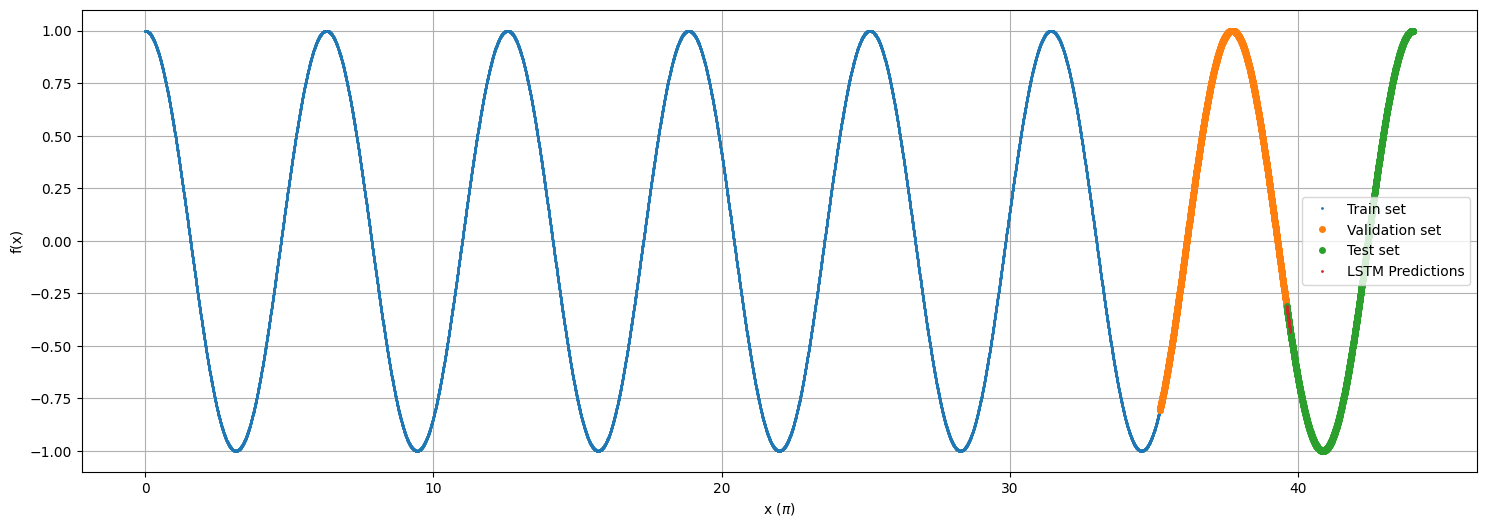

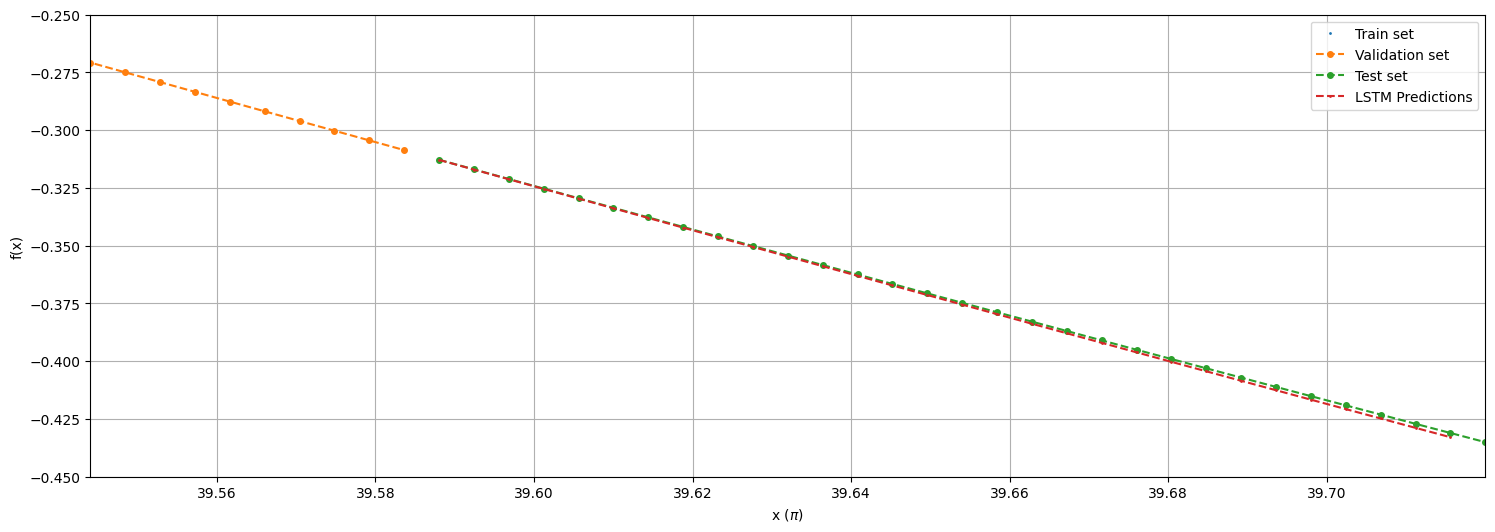

In [15]:
# plotting the sequences
fig = plt.figure( figsize = (18,6) )

plt.plot(t[ : trainSize], train, "o", markersize = 1, label = "Train set")
plt.plot(t[trainSize : trainSize + valSize], y_val.flatten(), "o", markersize = 4, label = "Validation set")
plt.plot(t[trainSize + valSize : ], y_test.flatten(), "o", markersize = 4, label = "Test set")
plt.plot(t[trainSize + valSize : trainSize + valSize + prediction_horizon], predictions_LSTM_10.flatten(), "o", markersize = 1, label = "LSTM Predictions")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.legend()
plt.grid()
plt.show()

# zoom in
fig = plt.figure( figsize = (18,6) )

plt.plot(t[ : trainSize], train, "o", markersize = 1, label = "Train set")
plt.plot(t[trainSize : trainSize + valSize], y_val.flatten(), "o--", markersize = 4, label = "Validation set")
plt.plot(t[trainSize + valSize : ], y_test.flatten(), "o--", markersize = 4, label = "Test set")
plt.plot(t[trainSize + valSize : trainSize + valSize + prediction_horizon], predictions_LSTM_10.flatten(), "o--", markersize = 1, label = "LSTM Predictions")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.xlim(t[trainSize + valSize - window], t[trainSize + valSize + prediction_horizon])

plt.ylim(-0.45,-0.25)
plt.legend()
plt.grid()
plt.show()

#### Changing the window size to 20

In [16]:
tr = 80
valPercent = 10

# training size
trainSize = int( len(sequence)*tr/100.0 )

# validation size
valSize = int( len(sequence)*valPercent/100.0 )

# setting the window size
window = 20

In [17]:
train = sequence[ : trainSize]  # train set

val = sequence[ trainSize - window : trainSize + valSize]  # validation set

test = sequence[ trainSize + valSize - window : ]  # test set

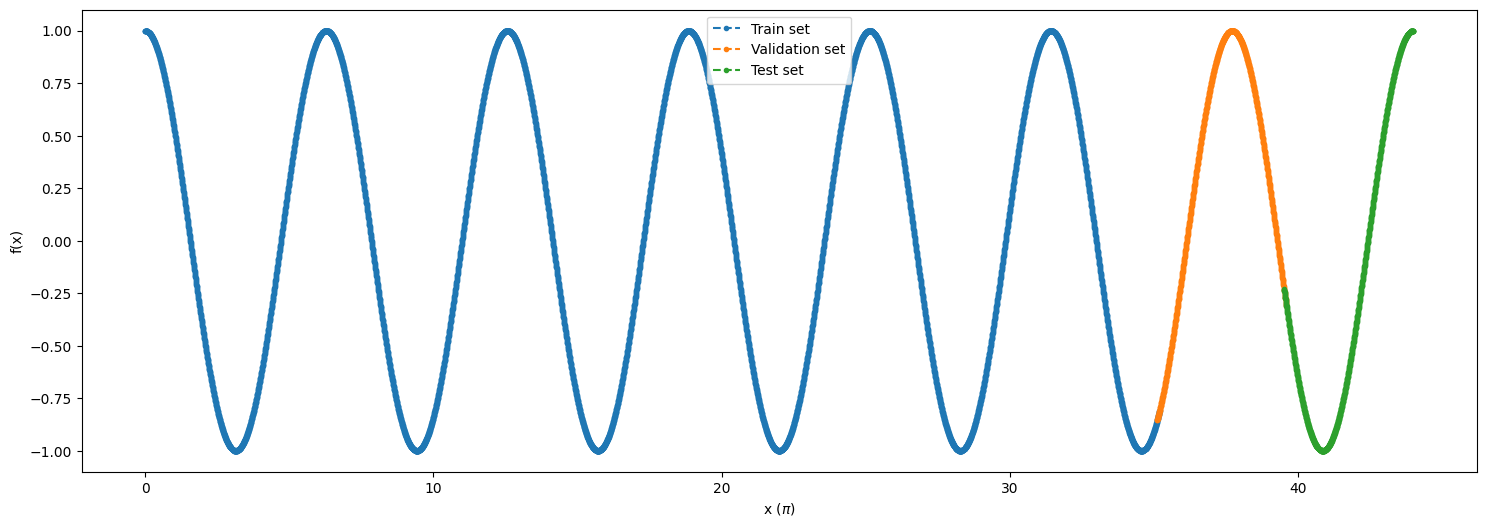

In [18]:
fig = plt.figure( figsize = (18,6) )

plt.plot(t[:trainSize], train, "o--", markersize = 3, label = "Train set")
plt.plot(t[trainSize - window : trainSize + valSize], val, "o--", markersize = 3, label = "Validation set")
plt.plot(t[trainSize + valSize - window : ], test, "o--", markersize = 3, label = "Test set")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.legend()
plt.show()

In [19]:
# train
x_train, y_train = create_dataset(train, window)
print ("Train:", x_train.shape, y_train.shape)

# validation
x_val, y_val = create_dataset(val, window)
print ("Validation:", x_val.shape, y_val.shape)

# test
x_test, y_test   = create_dataset(test, window)
print ("Test:", x_test.shape, y_test.shape)

Train: (7980, 20) (7980,)
Validation: (1000, 20) (1000,)
Test: (1000, 20) (1000,)


In [20]:
np.random.seed(44)
tf.random.set_seed(44)

x_train_lstm = np.reshape(x_train, (-1, window, 1))
x_val_lstm   = np.reshape(  x_val, (-1, window, 1))
x_test_lstm  = np.reshape( x_test, (-1, window, 1))

model_20 = Sequential()
model_20.add(Input(shape = (window, 1)))
model_20.add(LSTM(100))
model_20.add(Dense(1))

model_20.compile(loss = "mse", optimizer = "adam")

model_20.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
earlyStopping = EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

history = model_20.fit(x_train_lstm, y_train,
                   epochs = 100, batch_size = 32,
                   validation_data = (x_val_lstm, y_val),
                   callbacks = [earlyStopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0443 - val_loss: 5.2473e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3288e-04 - val_loss: 2.7617e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9526e-04 - val_loss: 1.1570e-04
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.5831e-05 - val_loss: 2.5202e-05
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3559e-05 - val_loss: 2.1554e-06
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2557e-06 - val_loss: 3.7610e-06
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7675e-06 - val_loss: 8.0197e-07
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.4959e-06 - val_loss: 3.1950e-06
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1235e-06 - val_loss: 8.6374e-07
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.1108e-06 - val_loss: 2.7785e-06
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

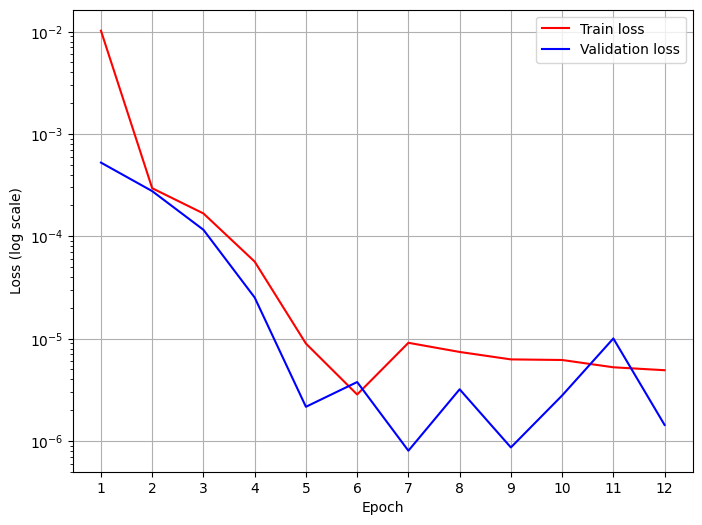

In [22]:
x_values = range(1, len(history.history['loss'])+1)
fig = plt.figure(figsize = (8,6))
plt.plot(x_values, history.history['loss'], "r-", label = "Train loss")
plt.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
plt.ylabel("Loss (log scale)")
plt.xlabel("Epoch")
plt.grid()
plt.yscale("log")
plt.xticks(x_values)
plt.legend()
plt.show()

In [23]:
prediction_horizon = 30
predictions_LSTM_20 = predictionOnPredictionLSTM(model_20, x_test_lstm[0], prediction_horizon)

In [24]:
print ("True value  Pred_20 value Error_20 (%)")
for y_true, y_pred_20 in zip(y_test[:10], predictions_LSTM_20[:10]) :
  print(f"{y_true:10.6f} {y_pred_20[0]:10.6f} {100*abs((y_pred_20[0]-y_true)/y_true):10.6f}")

True value  Pred_20 value Error_20 (%)
 -0.312780  -0.313848   0.341652
 -0.316955  -0.318139   0.373847
 -0.321123  -0.322489   0.425229
 -0.325286  -0.326888   0.492559
 -0.329442  -0.331330   0.572927
 -0.333592  -0.335808   0.664186
 -0.337736  -0.340318   0.764658
 -0.341873  -0.344857   0.873044
 -0.346003  -0.349422   0.988159
 -0.350126  -0.354010   1.109275


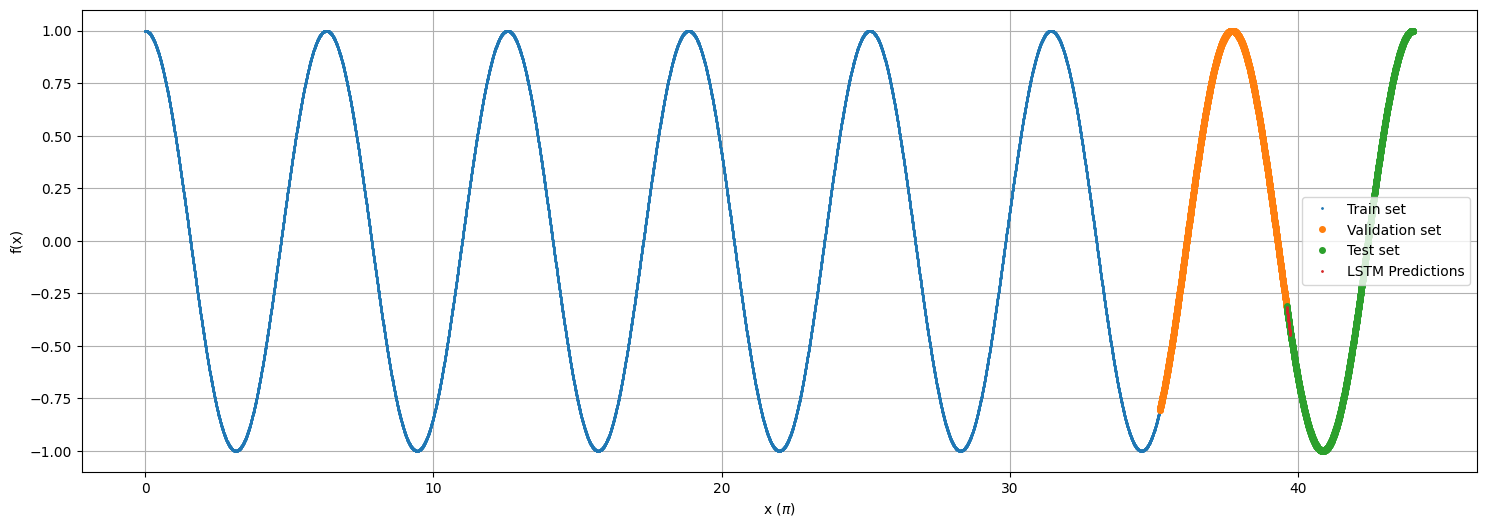

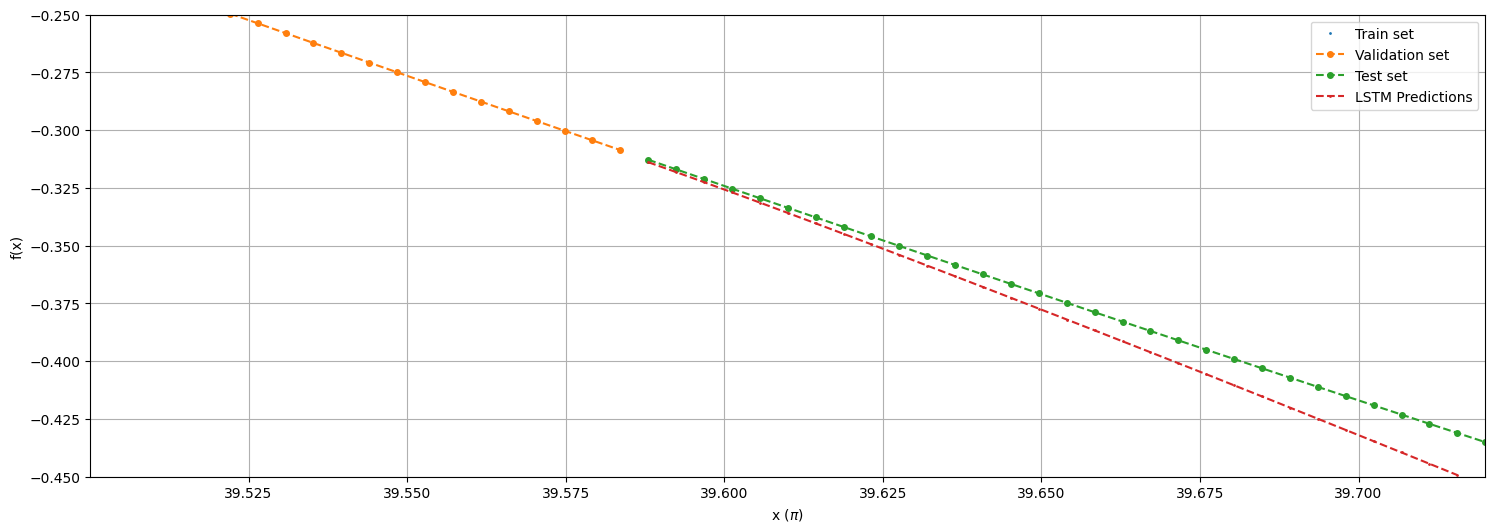

In [25]:
# plotting the sequences
fig = plt.figure( figsize = (18,6) )

plt.plot(t[ : trainSize], train, "o", markersize = 1, label = "Train set")
plt.plot(t[trainSize : trainSize + valSize], y_val.flatten(), "o", markersize = 4, label = "Validation set")
plt.plot(t[trainSize + valSize : ], y_test.flatten(), "o", markersize = 4, label = "Test set")
plt.plot(t[trainSize + valSize : trainSize + valSize + prediction_horizon], predictions_LSTM_20.flatten(), "o", markersize = 1, label = "LSTM Predictions")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.legend()
plt.grid()
plt.show()

# zoom in
fig = plt.figure( figsize = (18,6) )

plt.plot(t[ : trainSize], train, "o", markersize = 1, label = "Train set")
plt.plot(t[trainSize : trainSize + valSize], y_val.flatten(), "o--", markersize = 4, label = "Validation set")
plt.plot(t[trainSize + valSize : ], y_test.flatten(), "o--", markersize = 4, label = "Test set")
plt.plot(t[trainSize + valSize : trainSize + valSize + prediction_horizon], predictions_LSTM_20.flatten(), "o--", markersize = 1, label = "LSTM Predictions")

plt.ylabel("f(x)")
plt.xlabel(r"x $(\pi)$")

plt.xlim(t[trainSize + valSize - window], t[trainSize + valSize + prediction_horizon])

plt.ylim(-0.45,-0.25)
plt.legend()
plt.grid()
plt.show()

In [26]:
# printing the results of both models with window 10 and window 20
print ("Timestep True value    Pred_10    Pred_20  Error_10(%) Error_20(%)")
for i, y in enumerate(zip(y_test[:10], predictions_LSTM_10[:10], predictions_LSTM_20[:10])):
    y_true, y_pred_10, y_pred_20 = y
    print(f"    {i+1:2d}   {y_true:10.6f} {y_pred_10[0]:10.6f} {y_pred_20[0]:10.6f} {100*abs((y_pred_10[0]-y_true)/y_true):10.6f} {100*abs((y_pred_20[0]-y_true)/y_true):10.6f}")

Timestep True value    Pred_10    Pred_20  Error_10(%) Error_20(%)
     1    -0.312780  -0.312842  -0.313848   0.020018   0.341652
     2    -0.316955  -0.317028  -0.318139   0.023070   0.373847
     3    -0.321123  -0.321218  -0.322489   0.029493   0.425229
     4    -0.325286  -0.325411  -0.326888   0.038367   0.492559
     5    -0.329442  -0.329603  -0.331330   0.048920   0.572927
     6    -0.333592  -0.333794  -0.335808   0.060621   0.664186
     7    -0.337736  -0.337982  -0.340318   0.073056   0.764658
     8    -0.341873  -0.342167  -0.344857   0.085996   0.873044
     9    -0.346003  -0.346346  -0.349422   0.099265   0.988159
    10    -0.350126  -0.350521  -0.354010   0.112594   1.109275


##### We observed that in the test set, the model with a window size of 10 performs better than the model with a window size of 20 for the first three time steps. However, as we increase the prediction horizon, the model trained with a window size of 20 becomes more stable in its predictions. Although the model with a smaller window size initially achieves better accuracy for shorter prediction horizons, the model with a larger window size exhibits improved stability and performance over longer prediction horizons. 

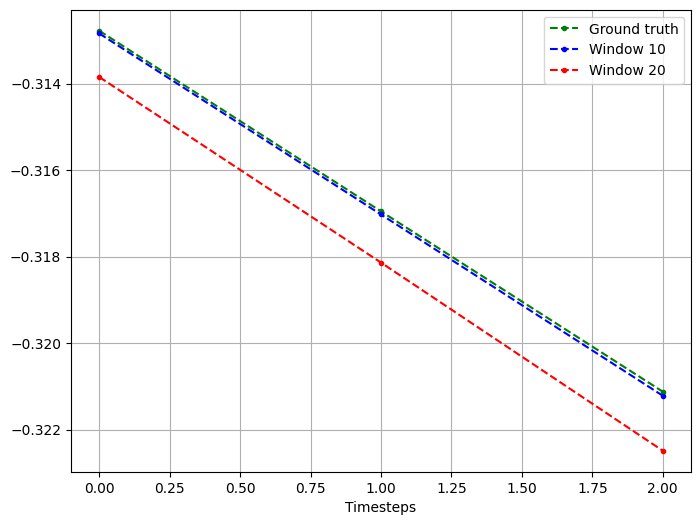

In [27]:
# plotting of the first three timesteps
fig = plt.figure(figsize = (8,6))
plt.plot(y_test[:3], "g--.", label = "Ground truth")
plt.plot(predictions_LSTM_10[:3], "b--.", label = "Window 10")
plt.plot(predictions_LSTM_20[:3], "r--.", label = "Window 20")
plt.xlabel("Timesteps")
plt.grid()
plt.legend()
plt.show()

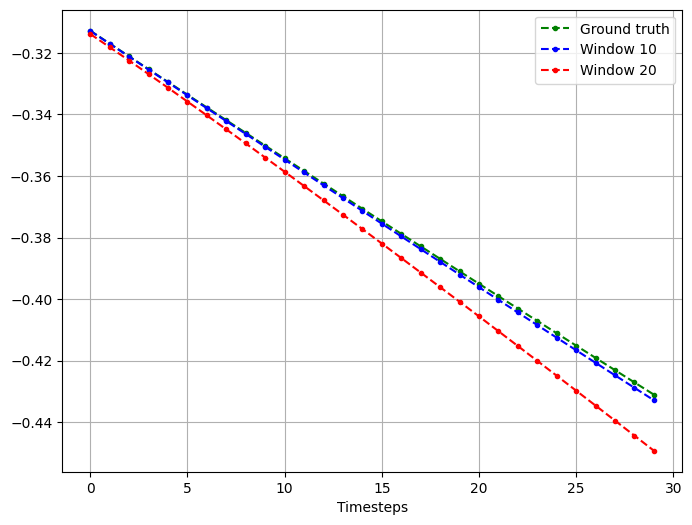

In [28]:
# plotting of the prediction of the first prediction horizon
fig = plt.figure(figsize = (8,6))
plt.plot(y_test[:prediction_horizon], "g--.", label = "Ground truth")
plt.plot(predictions_LSTM_10[:prediction_horizon], "b--.", label = "Window 10")
plt.plot(predictions_LSTM_20[:prediction_horizon], "r--.", label = "Window 20")
plt.xlabel("Timesteps")
plt.grid()
plt.legend()
plt.show()